In [7]:
print("2022503035-knapsack")

2022503035-knapsack


In [12]:
import random
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# typing import is for type hinting -> helps in writing more readable, maintainable and bug free code

In [13]:
## we are initialising the item with its name, weight and value
class Item:
    #init is constructor
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

##potential solution string
class Individual:
    def __init__(self, bits: List[int]):
        self.bits = bits
    
    #string of those bits (represented)
    def __str__(self):
        return repr(self.bits)
    
    #hash is a unique number that represents an object->stores in dictionaries->we assign same hashes to the numbers with same values to avoid repetition
    def __hash__(self):
        return hash(str(self.bits))
    
    def fitness(self) -> float:
        total_value = sum(bit*item.value for item, bit in zip(items, self.bits))
        total_weight = sum(bit*item.weight for item, bit in zip(items, self.bits))
        return total_value if total_weight <= MAX_KNAPSACK_WEIGHT else 0
    

Enter the number of items for consideration: 4
Enter name for item1: A
Enter weight for A: 7
Enter the value for A: 5
Enter name for item2: B
Enter weight for B: 2
Enter the value for B: 4
Enter name for item3: C
Enter weight for C: 1
Enter the value for C: 7
Enter name for item4: D
Enter weight for D: 9
Enter the value for D: 2
Enter the maximum knapsacj weight: 15
Enter the crossover rate. The value should be present between 0 and 1: 0.53
Enter the mutation rate. The value should be present between 0 and 1: 0.013
Enter the reprodctuion rate. The value should be present between 0 and 1:0.15


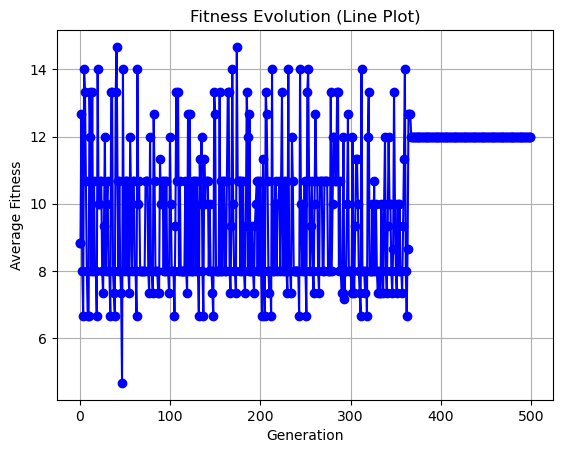

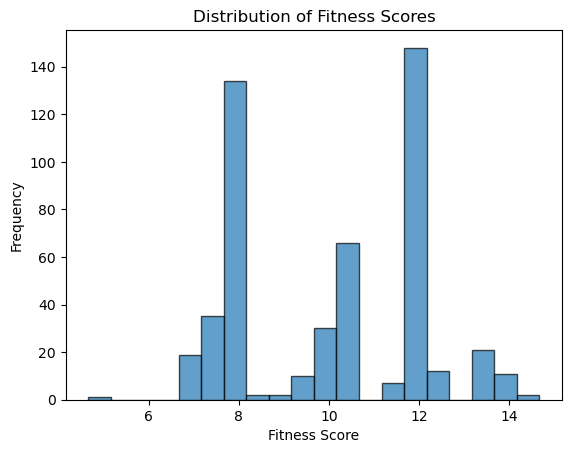

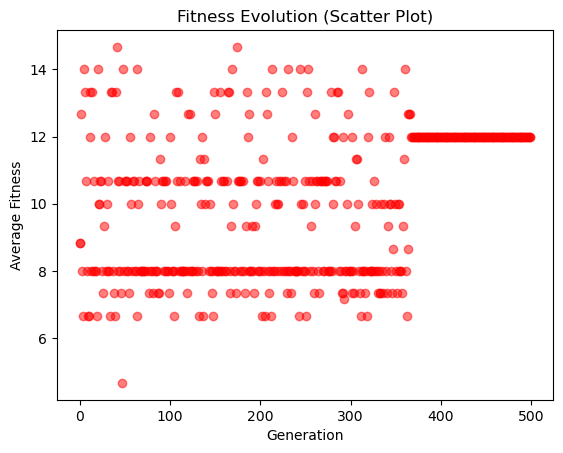

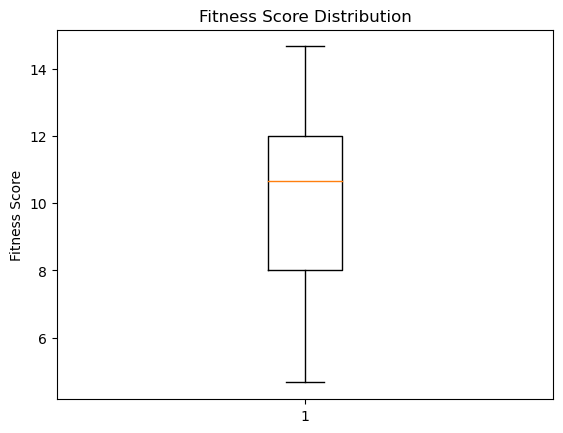

Best solution: [1, 0, 1, 0] Fitness: 12


In [15]:
def get_user_inputs():
    global MAX_KNAPSACK_WEIGHT, items, CROSSOVER_RATE, MUTATION_RATE, REPRODUCTION_RATE
    
    num_items = int(input("Enter the number of items for consideration: "))
    items = []
    for i in range(num_items):
        name = input(f"Enter name for item{i+1}: ")
        weight = int(input(f"Enter weight for {name}: "))
        value = int(input(f"Enter the value for {name}: "))
        items.append(Item(name, weight, value))
        
    MAX_KNAPSACK_WEIGHT = int(input(f"Enter the maximum knapsacj weight: "))
    CROSSOVER_RATE = float(input(f"Enter the crossover rate. The value should be present between 0 and 1: "))
    MUTATION_RATE = float(input(f"Enter the mutation rate. The value should be present between 0 and 1: "))
    REPRODUCTION_RATE = float(input(f"Enter the reprodctuion rate. The value should be present between 0 and 1:"))
    
def generate_initial_population(count=6) -> List[Individual]:
    population = set()##this is the set where we store the hash values
    while len(population) != count:
        bits = [random.choice([0, 1]) for _ in items]
        population.add(Individual(bits))
    return list(population)

##we slect only 4. but why? This speeds up the selection process by considering a small but diverse group instead of the entire population.
def selection(population: List[Individual]) -> List[Individual]:
    random.shuffle(population)
    return sorted(population[:4], key=lambda i: i.fitness(), reverse=True)[:2]
##we sort in decreasing order to get the max valued parents=take only the first two as parents 
## lambda is the anonymous function telling how to compare

def crossover(parents: List[Individual]) -> List[Individual]:
    N = len(items)
    child1 = parents[0].bits[:N//2] + parents[1].bits[N//2:]
    child2 = parents[0].bits[N//2:] + parents[1].bits[:N//2]
    return [Individual(child1), Individual(child2)]
## child with the same length as parents->takes first half from first parenst and second half from the other parent for child 1 - vice versa for the second child 

def mutate(individuals: List[Individual]):
    for individual in individuals:
        for i in range(len(individual.bits)):
            if random.random() < MUTATION_RATE:
                individual.bits[i] = 1 - individual.bits[i]

def next_generation(population: List[Individual], generation=0, max_gen=500, avg_fitnesses=[]) -> Individual:
    if generation == max_gen:
        population.sort(key=lambda i: i.fitness(), reverse=True)
        return population[0]
    
    next_gen = []
    while len(next_gen) < len(population):
        parents = selection(population)
        children = parents if random.random() < REPRODUCTION_RATE else crossover(parents)
        if random.random() < MUTATION_RATE:
            mutate(children)
        next_gen.extend(children)
    
    avg_fitnesses.append(sum(i.fitness() for i in population) / len(population))
    return next_generation(next_gen[:len(population)], generation+1, max_gen, avg_fitnesses)

# Visualization: Line Plot
def visualize_fitness_line(fitness_data):
    plt.plot(fitness_data, marker='o', linestyle='-', color='b')
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness")
    plt.title("Fitness Evolution (Line Plot)")
    plt.grid(True)
    plt.show()

# Visualization: Histogram
def visualize_fitness_histogram(fitness_data):
    plt.hist(fitness_data, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel("Fitness Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Fitness Scores")
    plt.show()

# Visualization: Scatter Plot
def visualize_fitness_scatter(fitness_data):
    plt.scatter(range(len(fitness_data)), fitness_data, color='red', alpha=0.5)
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness")
    plt.title("Fitness Evolution (Scatter Plot)")
    plt.show()

# Visualization: Box Plot
def visualize_fitness_box(fitness_data):
    plt.boxplot(fitness_data)
    plt.ylabel("Fitness Score")
    plt.title("Fitness Score Distribution")
    plt.show()


##solve knapsack
def solve_knapsack():
    get_user_inputs()
    population = generate_initial_population()
    avg_fitnesses = []
    best_solution = next_generation(population, avg_fitnesses=avg_fitnesses)
    visualize_fitness_line(avg_fitnesses)
    visualize_fitness_histogram(avg_fitnesses)
    visualize_fitness_scatter(avg_fitnesses)
    visualize_fitness_box(avg_fitnesses)


    return best_solution


if __name__ == '__main__':
    solution = solve_knapsack()
    print("Best solution:", solution, "Fitness:", solution.fitness())